# LIAR2 Dataset Analysis
Paper: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10568915

Github: https://github.com/chengxuphd/liar2/tree/main

In [5]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

df = pd.read_csv('../data/liar2/train.csv')

display(df.head(10))

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."
5,19520,0,"Video says COVID-19 vaccines are ""weapons of m...","March 28, 2021",facebook fact-checks;coronavirus,facebook posts,Posters on Facebook and other social media net...,NaN,24,50,108,245,1410,570,a video on Facebook,A video circulating on Facebook claims COVID-1...
6,5561,2,Says Jeff Reardon cut elementary school music ...,"May 8, 2012",education;message machine 2012;voting record,mike schaufler,"Rep. Mike Schaufler, D-Portland, represents Or...",oregon,0,0,0,1,0,0,campaign mailer,"If ""Reardon’s cuts"" shortchanged children, the..."
7,15600,3,One in three women is sexually assaulted on th...,"January 19, 2019",immigration;corrections and updates;homeland s...,donald trump,Donald Trump is the former president of the Un...,national,36,85,120,194,360,179,a speech,"Trump said, ""One in three women is sexually as..."
8,17285,1,It's actually the safest time to fly.,"March 13, 2020",public health;punditfact;coronavirus,ainsley earhardt,Ainsley Earhardt is a co-host of Fox News Chan...,NaN,0,0,0,0,2,0,the Fox & Friends show,"Earhardt said that ""it's actually the safest t..."
9,15300,1,We know dangerous criminals can slip through i...,"October 24, 2018",immigration,national republican senatorial committee,The National Republican Senatorial Committee h...,national,1,3,11,18,14,7,a digital ad,"NRSC said, ""We know dangerous criminals can sl..."


The count information is the historical statement truthfulness record of the speaker. 

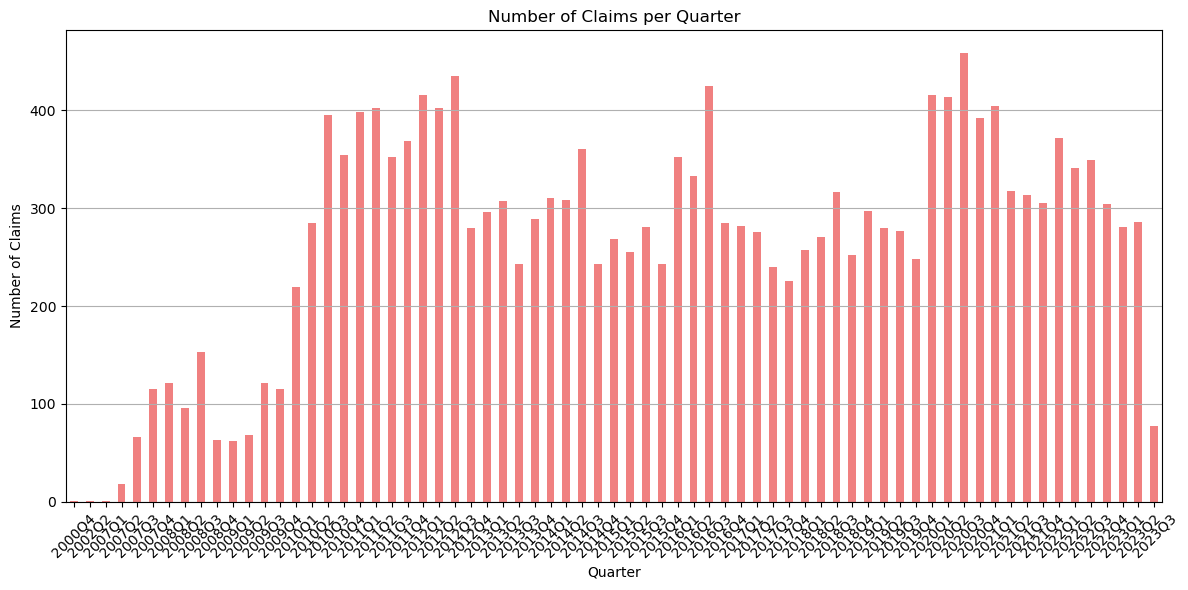

In [7]:
import matplotlib.pyplot as plt

# Convert claimDate to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract quarter and year from claimDate
df['quarter_year'] = df['date'].dt.to_period('Q')

# Count the number of claims per quarter
quarterly_claims = df['quarter_year'].value_counts().sort_index()

# Filter to only include claims from 2017 onwards and before 2025-02
quarterly_claims = quarterly_claims[(quarterly_claims.index >= '2000Q1') & (quarterly_claims.index < '2025Q1')]

# Plotting
plt.figure(figsize=(12, 6))
quarterly_claims.plot(kind='bar', color='lightcoral')
plt.title('Number of Claims per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Compared to the google api dataset, LIAR2 contains more data from before 2016. 

One weakness of LIAR2 dataset is that the historical truthfulness record is fixed. This could lead to more accurate results for a speaker's earlier claims. 